In [173]:
# !pip install numpy 
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn
# !pip install seaborn
# !pip install plotly-express
# !pip install lightgbm
# !pip install statsmodels
# !pip install scikit-optimize

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pickle
# from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.gofplots import qqplot_2samples
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import sklearn.gaussian_process as gp
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.dates as mdates
import lightgbm as lgb
from sklearn.linear_model import Ridge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from skopt import gp_minimize
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
from lightgbm import LGBMRegressor

In [175]:
%run models/Linear_Regression.ipynb

In [176]:
###################### Null values are already removed from this data set ##############################

In [177]:
data = pd.read_csv(r'D:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\data\final_df.csv')
data

pm1Palas  pm2_5Palas   pm4Palas  pm10Palas  pmTotalPalas   dCnPalas  \
0     2.718542    2.820000   3.085417   3.112500      3.148958  97.440417   
1     2.067500    2.130000   2.232708   2.231875      2.232708  73.388750   
2     1.904375    2.000000   2.135833   2.132083      2.135833  66.655000   
3     1.681458    1.876042   2.078333   2.072917      2.086667  58.758958   
4     1.540208    1.661458   1.834792   1.824792      1.834792  57.921875   
...        ...         ...        ...        ...           ...        ...   
8326  4.982917   12.055000  21.223333  31.216250     37.864167  77.197500   
8327  4.544583    9.235833  15.932083  17.556667     19.295000  71.974583   
8328  4.834167   10.393750  16.646667  24.890000     29.965000  72.302500   
8329  4.537917    9.765417  16.986667  18.576667     20.265833  70.609167   
8330  4.430000    9.886667  17.401667  20.421250     22.930000  70.784167   

                   dateTime  NH3_loRa  CO2_loRa  NO2_loRa  ...  C2H5OH_loRa  \
0     2020-06-17T16:32:00.0      0.14     724.0      5.16  ...         0.94   
1     2020-06-17T16:33:00.0      0.14     663.0      5.11  ...         0.92   
2     2020-06-17T16:33:30.0      0.14     698.0      5.11  ...         0.92   
3     2020-06-17T16:35:30.0      0.14     681.0      4.85  ...         0.85   
4     2020-06-17T16:37:00.0      0.14     686.0      4.88  ...         0.86   
...                     ...       ...       ...       ...  ...          ...   
8326  2020-07-15T00:27:30.0      0.14       0.0      4.49  ...         0.76   
8327  2020-07-15T00:29:00.0      0.14       0.0      4.49  ...         0.76   
8328  2020-07-15T00:30:00.0      0.14       0.0      4.49  ...         0.76   
8329  2020-07-15T00:30:30.0      0.14       0.0      4.49  ...         0.76   
8330  2020-07-15T00:31:00.0      0.14       0.0      4.49  ...         0.76   

      P1_lpo_loRa  P1_ratio_loRa  P1_conc_loRa  P2_lpo_loRa  P2_ratio_loRa  \
0       2051025.0          13.67       9212.48    3820665.0          25.47   
1       2175028.0          14.50      10095.36    4235407.0          28.24   
2       1672212.0          11.15       6849.39    3967298.0          26.45   
3       2295499.0          15.30      11010.73    3623442.0          24.16   
4       1544578.0          10.30       6153.25    3452410.0          23.02   
...           ...            ...           ...          ...            ...   
8326     995050.0           6.63       3604.02    3534290.0          23.56   
8327    1126826.0           7.51       4158.83    3641409.0          24.28   
8328     938517.0           6.26       3374.82    3211260.0          21.41   
8329     861083.0           5.74       3068.57    4171597.0          27.81   
8330     775231.0           5.17       2738.44    3814114.0          25.43   

      P2_conc_loRa  Temperature_loRa  Pressure_loRa  Humidity_loRa  
0         28957.81             32.78        99243.0           37.0  
1         36416.78             32.90        99247.0           36.0  
2         31447.53             32.89        99246.0           36.0  
3         25849.88             33.07        99248.0           37.0  
4         23367.73             33.12        99246.0           37.0  
...            ...               ...            ...            ...  
8326      24532.03             36.60        98497.0           39.0  
8327      26121.92             36.71        98501.0           39.0  
8328      20184.45             36.71        98497.0           39.0  
8329      35183.72             36.61        98495.0           39.0  
8330      28850.20             36.54        98499.0           39.0  

[8331 rows x 24 columns]

In [178]:
data.columns

Index(['pm1Palas', 'pm2_5Palas', 'pm4Palas', 'pm10Palas', 'pmTotalPalas',
       'dCnPalas', 'dateTime', 'NH3_loRa', 'CO2_loRa', 'NO2_loRa', 'C3H8_loRa',
       'C4H10_loRa', 'CH4_loRa', 'H2_loRa', 'C2H5OH_loRa', 'P1_lpo_loRa',
       'P1_ratio_loRa', 'P1_conc_loRa', 'P2_lpo_loRa', 'P2_ratio_loRa',
       'P2_conc_loRa', 'Temperature_loRa', 'Pressure_loRa', 'Humidity_loRa'],
      dtype='object')

In [179]:
len(data.columns)

24

In [180]:
df= pd.concat([data.iloc[:,6], data.iloc[:,0:6],data.iloc[:,15:data.shape[1]]],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8331 entries, 0 to 8330
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dateTime          8331 non-null   object 
 1   pm1Palas          8331 non-null   float64
 2   pm2_5Palas        8331 non-null   float64
 3   pm4Palas          8331 non-null   float64
 4   pm10Palas         8331 non-null   float64
 5   pmTotalPalas      8331 non-null   float64
 6   dCnPalas          8331 non-null   float64
 7   P1_lpo_loRa       8331 non-null   float64
 8   P1_ratio_loRa     8331 non-null   float64
 9   P1_conc_loRa      8331 non-null   float64
 10  P2_lpo_loRa       8331 non-null   float64
 11  P2_ratio_loRa     8331 non-null   float64
 12  P2_conc_loRa      8331 non-null   float64
 13  Temperature_loRa  8331 non-null   float64
 14  Pressure_loRa     8331 non-null   float64
 15  Humidity_loRa     8331 non-null   float64
dtypes: float64(15), object(1)
memory usage: 1.

In [181]:
def data_checker(df):
    data_frame = df.iloc[:,1:16]

    # Palas limits are 0-100 mg/m3
    #BME limits are :Temp -40C to 85C
                   #:Pressure 300hPa to 1100 hPa or  300*100Pa to 1100*100 Pa
                   #:Humidity 0% to 100%
     #PPD42NS :Operating Temp is 0C to 45C
    idx = data_frame[(data_frame['Temperature_loRa']>=0) & (data_frame['Temperature_loRa']<=45) &
                    (data_frame['Pressure_loRa']>=300*100) & (data_frame['Pressure_loRa']<=1100*100) &
                    (data_frame['Humidity_loRa']>=0) & (data_frame['Humidity_loRa']<=100) &
                    (data_frame['pm1Palas']>=0) & (data_frame['pm2_5Palas']>=0) &
                    (data_frame['pm4Palas']>=0) & (data_frame['pm10Palas']>=0) &
                    (data_frame['pmTotalPalas']>=0) & (data_frame['dCnPalas']>=0)&
                    (data_frame['pm1Palas']<=100000) & (data_frame['pm2_5Palas']<=100000) &
                    (data_frame['pm4Palas']<=100000) & (data_frame['pm10Palas']<=100000) &
                    (data_frame['pmTotalPalas']<=100000) & (data_frame['dCnPalas']<=100000)].index
                    # &
                    # (data_frame['P1_conc_loRa'] + data_frame['P2_conc_loRa']>=0) &
                    # (data_frame['P1_conc_loRa'] + data_frame['P2_conc_loRa']<=28000)].index
    return df.loc[idx]
data_checker(df)

dateTime  pm1Palas  pm2_5Palas   pm4Palas  pm10Palas  \
0     2020-06-17T16:32:00.0  2.718542    2.820000   3.085417   3.112500   
1     2020-06-17T16:33:00.0  2.067500    2.130000   2.232708   2.231875   
2     2020-06-17T16:33:30.0  1.904375    2.000000   2.135833   2.132083   
3     2020-06-17T16:35:30.0  1.681458    1.876042   2.078333   2.072917   
4     2020-06-17T16:37:00.0  1.540208    1.661458   1.834792   1.824792   
...                     ...       ...         ...        ...        ...   
8326  2020-07-15T00:27:30.0  4.982917   12.055000  21.223333  31.216250   
8327  2020-07-15T00:29:00.0  4.544583    9.235833  15.932083  17.556667   
8328  2020-07-15T00:30:00.0  4.834167   10.393750  16.646667  24.890000   
8329  2020-07-15T00:30:30.0  4.537917    9.765417  16.986667  18.576667   
8330  2020-07-15T00:31:00.0  4.430000    9.886667  17.401667  20.421250   

      pmTotalPalas   dCnPalas  P1_lpo_loRa  P1_ratio_loRa  P1_conc_loRa  \
0         3.148958  97.440417    2051025.0          13.67       9212.48   
1         2.232708  73.388750    2175028.0          14.50      10095.36   
2         2.135833  66.655000    1672212.0          11.15       6849.39   
3         2.086667  58.758958    2295499.0          15.30      11010.73   
4         1.834792  57.921875    1544578.0          10.30       6153.25   
...            ...        ...          ...            ...           ...   
8326     37.864167  77.197500     995050.0           6.63       3604.02   
8327     19.295000  71.974583    1126826.0           7.51       4158.83   
8328     29.965000  72.302500     938517.0           6.26       3374.82   
8329     20.265833  70.609167     861083.0           5.74       3068.57   
8330     22.930000  70.784167     775231.0           5.17       2738.44   

      P2_lpo_loRa  P2_ratio_loRa  P2_conc_loRa  Temperature_loRa  \
0       3820665.0          25.47      28957.81             32.78   
1       4235407.0          28.24      36416.78             32.90   
2       3967298.0          26.45      31447.53             32.89   
3       3623442.0          24.16      25849.88             33.07   
4       3452410.0          23.02      23367.73             33.12   
...           ...            ...           ...               ...   
8326    3534290.0          23.56      24532.03             36.60   
8327    3641409.0          24.28      26121.92             36.71   
8328    3211260.0          21.41      20184.45             36.71   
8329    4171597.0          27.81      35183.72             36.61   
8330    3814114.0          25.43      28850.20             36.54   

      Pressure_loRa  Humidity_loRa  
0           99243.0           37.0  
1           99247.0           36.0  
2           99246.0           36.0  
3           99248.0           37.0  
4           99246.0           37.0  
...             ...            ...  
8326        98497.0           39.0  
8327        98501.0           39.0  
8328        98497.0           39.0  
8329        98495.0           39.0  
8330        98499.0           39.0  

[8331 rows x 16 columns]

In [182]:
df = data_checker(df)

In [183]:
df.describe()

pm1Palas   pm2_5Palas     pm4Palas    pm10Palas  pmTotalPalas  \
count  8331.000000  8331.000000  8331.000000  8331.000000   8331.000000   
mean      5.663561    10.574945    17.154541    21.210712     24.942589   
std       3.081486     7.963725    15.343937    19.916630     24.352067   
min       0.511250     0.533750     0.557083     0.557083      0.557083   
25%       3.130163     4.294896     5.628487     6.954312      7.750417   
50%       5.339167     9.227917    13.587083    15.651250     17.875833   
75%       7.435104    13.286250    21.502604    27.281667     32.010833   
max      17.974375    57.148333   118.856667   168.116667    204.600000   

          dCnPalas   P1_lpo_loRa  P1_ratio_loRa  P1_conc_loRa   P2_lpo_loRa  \
count  8331.000000  8.331000e+03    8331.000000   8331.000000  8.331000e+03   
mean    118.392751  1.347020e+06       8.980150   5406.008278  3.946945e+06   
std      59.448553  4.568252e+05       3.045494   2356.873927  7.851387e+05   
min      13.548750  5.930900e+04       0.400000    205.700000  1.725361e+06   
25%      74.217983  1.038886e+06       6.925000   3785.255000  3.413145e+06   
50%     105.651884  1.328860e+06       8.860000   5073.910000  3.743776e+06   
75%     140.669167  1.637322e+06      10.915000   6654.515000  4.487964e+06   
max     383.967083  2.656432e+06      17.710000  14127.430000  6.209494e+06   

       P2_ratio_loRa  P2_conc_loRa  Temperature_loRa  Pressure_loRa  \
count    8331.000000   8331.000000       8331.000000    8331.000000   
mean       26.312995  33441.307509         34.513146   98795.239827   
std         5.234295  15520.607924          2.975260     301.004359   
min        11.500000   7153.120000          0.000000   91988.000000   
25%        22.755000  22824.720000         33.050000   98643.000000   
50%        24.960000  27713.980000         34.760000   98800.000000   
75%        29.920000  41619.480000         36.425000   98951.000000   
max        41.400000  93049.530000         41.340000   99329.000000   

       Humidity_loRa  
count    8331.000000  
mean       46.928100  
std        10.636321  
min        23.000000  
25%        41.000000  
50%        46.000000  
75%        53.000000  
max       100.000000

In [184]:
########### Plot the distribution of all the input parameters ############

In [185]:
dict_col_names = {'pm1Palas':'PM$_{1.0}$ in $\mu g/m^3 $ (Palas)', 
                  'pm2_5Palas': 'PM$_{2.5}$ in $\mu g/m^3$ (Palas)',
                  'pm4Palas': 'PM$_{4.0}$ in $\mu g/m^3$ (Palas)',
                  'pm10Palas': 'PM$_{10.0}$ in $\mu g/m^3$ (Palas)',
                  'pmTotalPalas': 'Total PM Concentration in $\mu g/m^3$ (Palas)', 
                  'dCnPalas': 'Particle Count Density in #/cm$^{3}$ (Palas)', 
                  'P1_lpo_loRa': '> 1 μm LPO (LoRa)',
                  'P1_ratio_loRa': '> 1 μm Ratio (LoRa)',
                  'P1_conc_loRa':'> 1 μm Concentration in $\mu g/m^3$ (LoRa)' , 
                  'P2_lpo_loRa': '> 2.5 μm LPO (LoRa)',
                  'P2_ratio_loRa': '> 2.5 μm Ratio (LoRa)', 
                  'P2_conc_loRa': '> 2.5 μm Concentration in $\mu g/m^3$ (LoRa)',
                  'Temperature_loRa': 'Temperature in ℃ (LoRa)', 
                  'Pressure_loRa': 'Pressure in Pa (LoRa)',
                  'Humidity_loRa': 'Humidity in % (LoRa)'} 

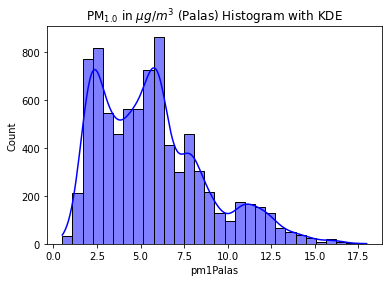

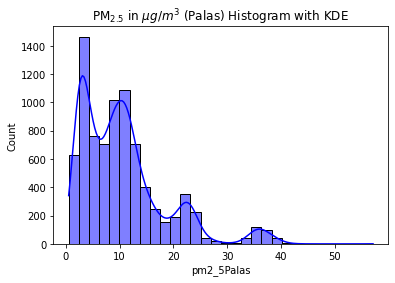

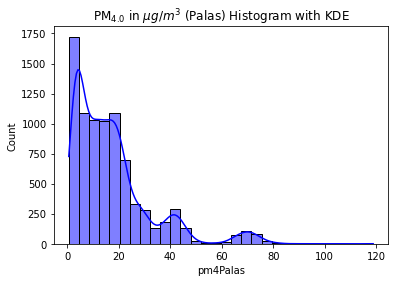

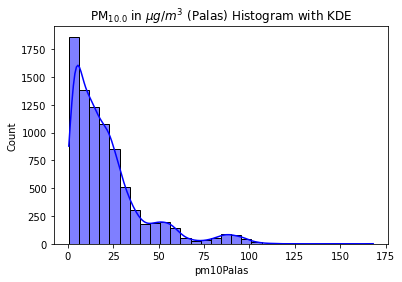

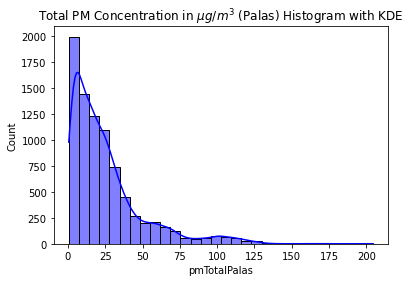

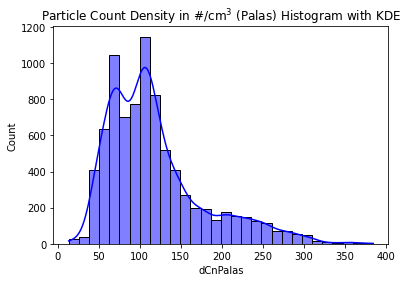

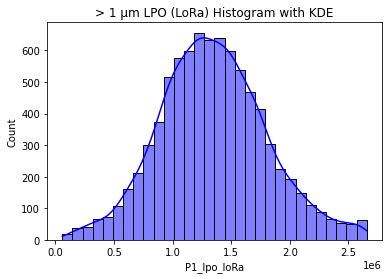

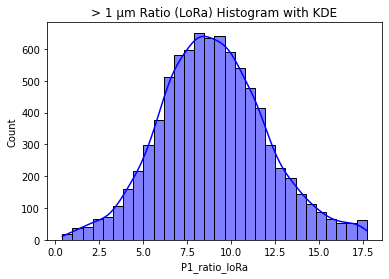

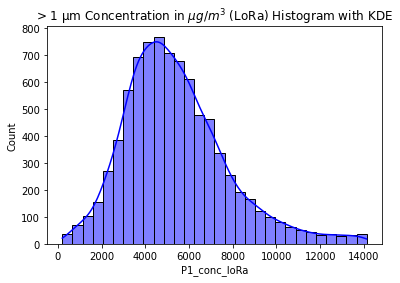

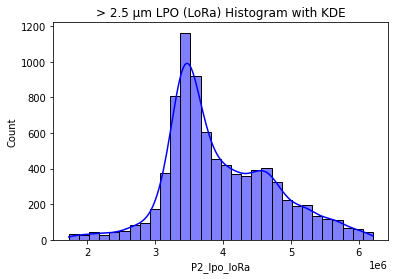

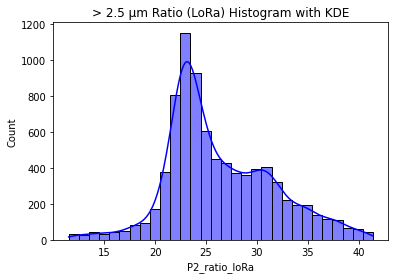

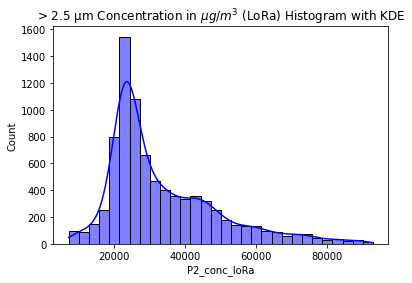

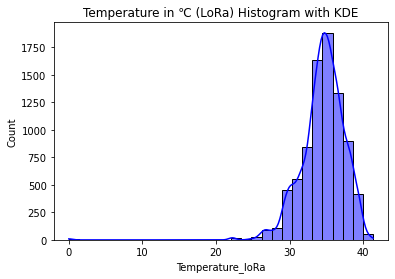

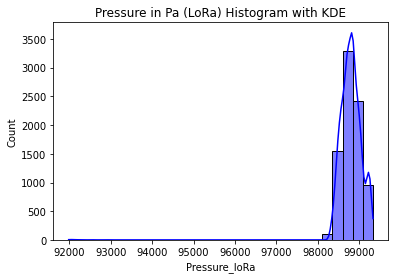

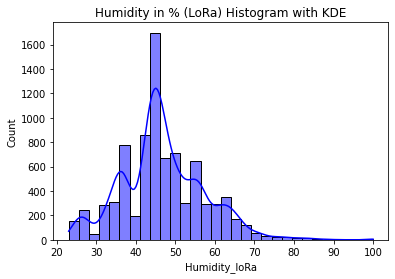

In [186]:
def hist_plots(df):
    for col in df.columns[1:len(df.columns)]:
        sns.histplot(df[col], kde = True, color = 'blue', bins = 30)
        plt.title(f'{dict_col_names[col]} Histogram with KDE')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
hist_plots(df)

In [187]:
############# Plotting box plot for each parameter ################

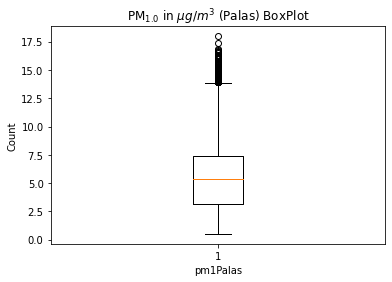

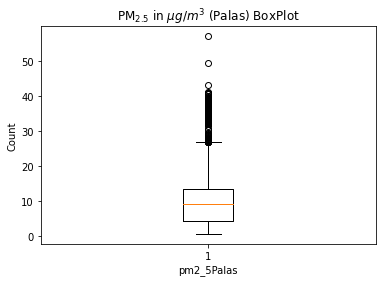

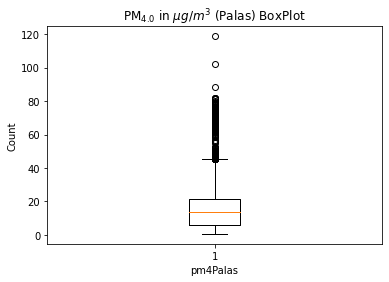

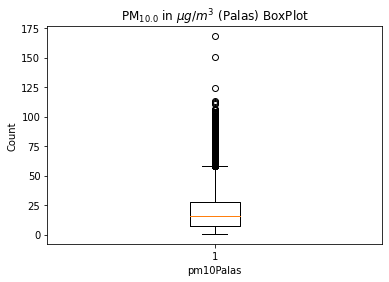

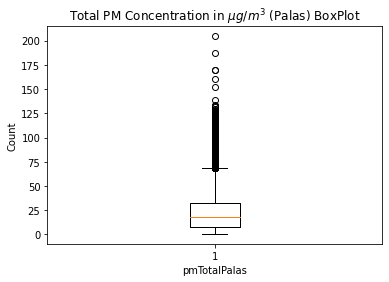

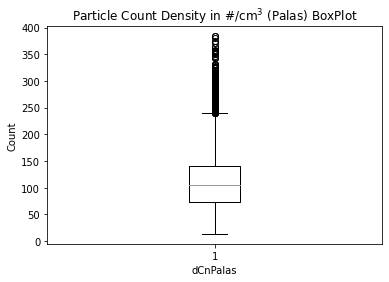

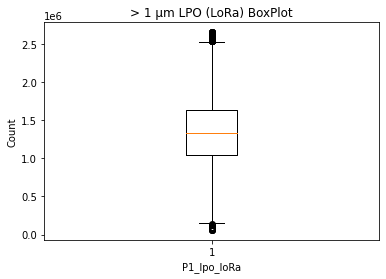

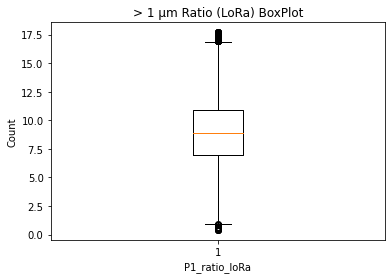

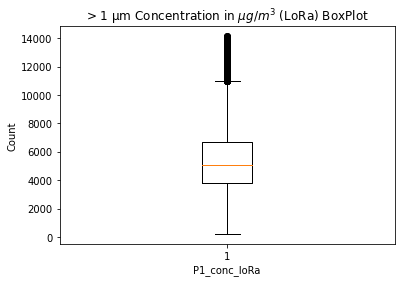

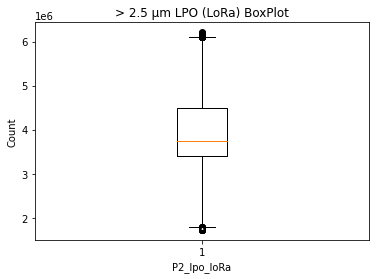

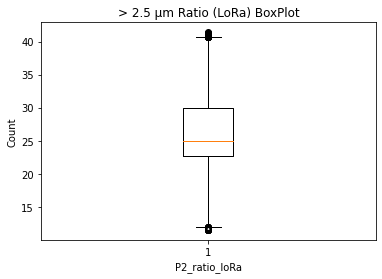

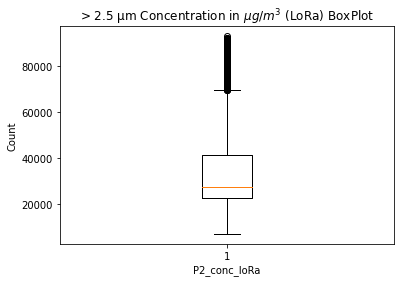

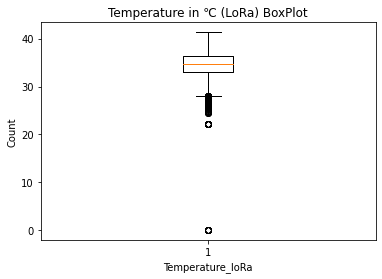

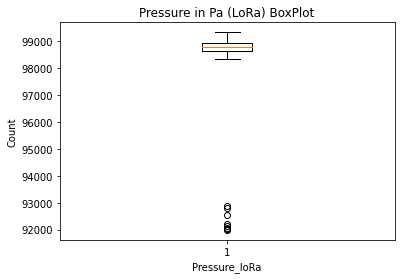

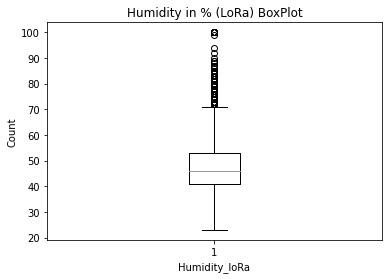

In [188]:
def box_plots(df):
    for col in df.columns[1:len(df.columns)]:
        plt.boxplot(df[col])
        plt.title(f'{dict_col_names[col]} BoxPlot')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
box_plots(df)

In [189]:
df_up = df.iloc[:,1:len(df.columns)]
df_up

pm1Palas  pm2_5Palas   pm4Palas  pm10Palas  pmTotalPalas   dCnPalas  \
0     2.718542    2.820000   3.085417   3.112500      3.148958  97.440417   
1     2.067500    2.130000   2.232708   2.231875      2.232708  73.388750   
2     1.904375    2.000000   2.135833   2.132083      2.135833  66.655000   
3     1.681458    1.876042   2.078333   2.072917      2.086667  58.758958   
4     1.540208    1.661458   1.834792   1.824792      1.834792  57.921875   
...        ...         ...        ...        ...           ...        ...   
8326  4.982917   12.055000  21.223333  31.216250     37.864167  77.197500   
8327  4.544583    9.235833  15.932083  17.556667     19.295000  71.974583   
8328  4.834167   10.393750  16.646667  24.890000     29.965000  72.302500   
8329  4.537917    9.765417  16.986667  18.576667     20.265833  70.609167   
8330  4.430000    9.886667  17.401667  20.421250     22.930000  70.784167   

      P1_lpo_loRa  P1_ratio_loRa  P1_conc_loRa  P2_lpo_loRa  P2_ratio_loRa  \
0       2051025.0          13.67       9212.48    3820665.0          25.47   
1       2175028.0          14.50      10095.36    4235407.0          28.24   
2       1672212.0          11.15       6849.39    3967298.0          26.45   
3       2295499.0          15.30      11010.73    3623442.0          24.16   
4       1544578.0          10.30       6153.25    3452410.0          23.02   
...           ...            ...           ...          ...            ...   
8326     995050.0           6.63       3604.02    3534290.0          23.56   
8327    1126826.0           7.51       4158.83    3641409.0          24.28   
8328     938517.0           6.26       3374.82    3211260.0          21.41   
8329     861083.0           5.74       3068.57    4171597.0          27.81   
8330     775231.0           5.17       2738.44    3814114.0          25.43   

      P2_conc_loRa  Temperature_loRa  Pressure_loRa  Humidity_loRa  
0         28957.81             32.78        99243.0           37.0  
1         36416.78             32.90        99247.0           36.0  
2         31447.53             32.89        99246.0           36.0  
3         25849.88             33.07        99248.0           37.0  
4         23367.73             33.12        99246.0           37.0  
...            ...               ...            ...            ...  
8326      24532.03             36.60        98497.0           39.0  
8327      26121.92             36.71        98501.0           39.0  
8328      20184.45             36.71        98497.0           39.0  
8329      35183.72             36.61        98495.0           39.0  
8330      28850.20             36.54        98499.0           39.0  

[8331 rows x 15 columns]

In [190]:
###################### Removing Outliers using IQR method ############################

In [191]:

# iqr_multiplier = 1.5

# def filter_outliers(series):
#     q1 = series.quantile(0.25)
#     q3 = series.quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - iqr_multiplier * iqr
#     upper_bound = q3 + iqr_multiplier * iqr
#     return (series >= lower_bound) & (series <= upper_bound)

# # Apply the filter_outliers function to each column
# filtered_df_outlier = df_up.apply(filter_outliers)

# filtered_df_outlier #If you check row 3 there is a mix of true and false values
# # In the next part of the code that row will be removed since there is one outlier
# # A row with atleast one outlier will be removed. 

In [192]:
# # Combine the filters for all parameters using logical AND
# final_filter = filtered_df_outlier.all(axis=1)

# # Apply the final filter to the original DataFrame
# filtered_data = df[final_filter]

# # Display the filtered DataFrame
# filtered_data


In [193]:
# hist_plots(filtered_data)

In [194]:
# box_plots(filtered_data)

In [195]:
######################### Start Running various Machine Learning Models ###########################

In [196]:
#Linear Regression

In [197]:
#Insted of filtered data lets use df and see the difference
filtered_data = df

In [198]:
col_name = list(df)
x =[]
y_Palas  = []
for i in col_name:
    if "_loRa" in i:
        x.append(i)
    if "Palas" in i:
        y_Palas.append(i)
Palas = {}
for i in y_Palas:
    Palas_cols = x + [i]
    Palas[i[:-len("Palas")]] = filtered_data[Palas_cols]
y_Palas

['pm1Palas', 'pm2_5Palas', 'pm4Palas', 'pm10Palas', 'pmTotalPalas', 'dCnPalas']

In [199]:
def plot_residuals(predict_test,y_test,filtered_data):
    idx = X_test.index
    data_test = filtered_data.loc[idx]
    data_test["dateTime"] = pd.to_datetime(data_test["dateTime"])
    residuals = (np.array(y_test) - predict_test)**2
    plt.figure()
    plt.scatter(data_test["dateTime"], residuals)
    plt.xticks(rotation = 45)
    plt.xlabel('Date Time')
    plt.ylabel(y_test.name)
    plt.show()

In [200]:
dict_col_regression = {'pm1Palas':'PM$_{1.0}$', 
                       'pm2_5Palas': 'PM$_{2.5}$',
                       'pm4Palas': 'PM$_{4.0}$',
                       'pm10Palas': 'PM$_{10.0}$',
                       'pmTotalPalas': 'Total PM Concentration', 
                       'dCnPalas': 'Particle Count Density',
                       'dateTime': 'Date Time',
                       'P1_lpo_loRa':'> 1 μm LPO',
                       'P1_ratio_loRa': '> 1 μm ratio', 
                       'P1_conc_loRa': '> 1 μm Concentration', 
                       'P2_lpo_loRa': '> 2.5 μm LPO', 
                       'P2_ratio_loRa': '> 2.5 μm ratio',
                       'P2_conc_loRa': '> 2.5 μm Concentration' , 
                       'Temperature_loRa': 'Temperature', 
                       'Pressure_loRa': 'Pressure', 
                       'Humidity_loRa':'Humidity'}
unit_regression = {'pm_conc':'($\mu g/m^3$)',
                   'dCn':'(#/cm$^{3}$)'} 

In [201]:
for k,v in enumerate(Palas):
    print(v)

pm1
pm2_5
pm4
pm10
pmTotal
dCn


x train (6248, 9)
x test (2083, 9)
y train (6248,)
y test (2083,)
========================= Random Forest Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\opt

target:  pm1
number of esimators:  100
maximum depth:  30
minimum_samples_split:  2
min_samples_leaf:  1
        Actual  Predicted  Category
0     2.718542   1.527477   Testing
1     2.067500   1.937259   Testing
2     1.904375   1.787549  Training
3     1.681458   1.748881  Training
4     1.540208   1.594940  Training
...        ...        ...       ...
8326  4.982917   4.821062   Testing
8327  4.544583   4.640644  Training
8328  4.834167   4.801082  Training
8329  4.537917   4.734326  Training
8330  4.430000   4.487194  Training

[8331 rows x 3 columns]
R2 value of train data: 0.98
R2 value of test data: 0.87


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

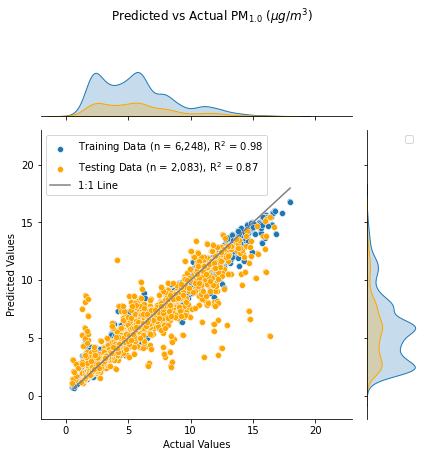

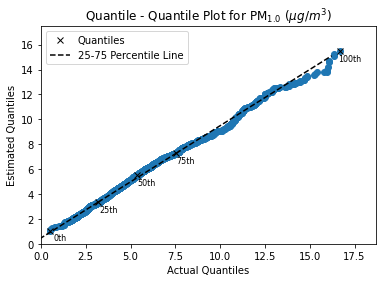

P1_lpo
P1_ratio
P1_conc
P2_lpo
P2_ratio
P2_conc
Temperature
Pressure
Humidity
feat_imp [0.01765912 0.0148836  0.02001068 0.01883362 0.01582853 0.01706173
 0.32381803 0.3082602  0.26364451]
P1_lpo         0.017659
P1_ratio       0.014884
P1_conc        0.020011
P2_lpo         0.018834
P2_ratio       0.015829
P2_conc        0.017062
Temperature    0.323818
Pressure       0.308260
Humidity       0.263645
dtype: float64


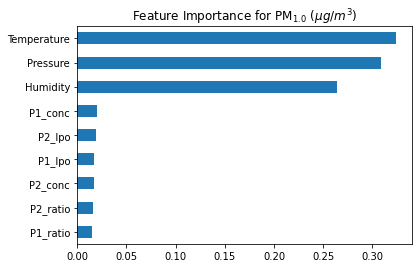

========================= Decision Tree Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


        Actual  Predicted  Category
0     2.718542   1.356458   Testing
1     2.067500   1.904375   Testing
2     1.904375   1.904375  Training
3     1.681458   1.681458  Training
4     1.540208   1.540208  Training
...        ...        ...       ...
8326  4.982917   4.537917   Testing
8327  4.544583   4.544583  Training
8328  4.834167   4.834167  Training
8329  4.537917   4.537917  Training
8330  4.430000   4.430000  Training

[8331 rows x 3 columns]
R2 value of train data 1.0
R2 value of test data 0.78


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

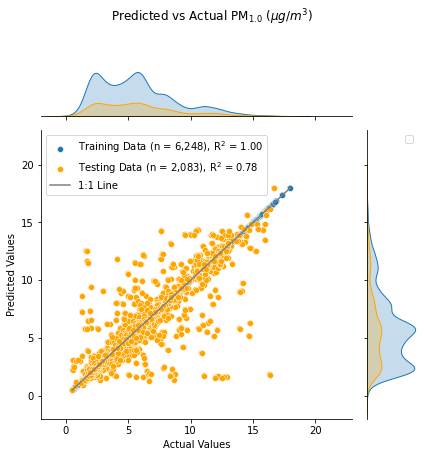

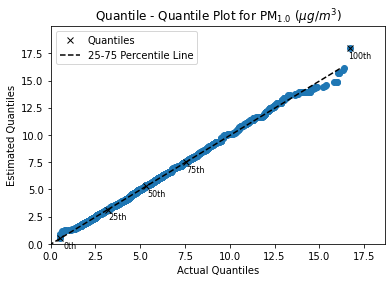

P1_lpo
P1_ratio
P1_conc
P2_lpo
P2_ratio
P2_conc
Temperature
Pressure
Humidity
feat_imp [0.00979595 0.01361725 0.02109904 0.01876489 0.00835737 0.00881934
 0.30738455 0.33504282 0.27711879]
P1_lpo         0.009796
P1_ratio       0.013617
P1_conc        0.021099
P2_lpo         0.018765
P2_ratio       0.008357
P2_conc        0.008819
Temperature    0.307385
Pressure       0.335043
Humidity       0.277119
dtype: float64


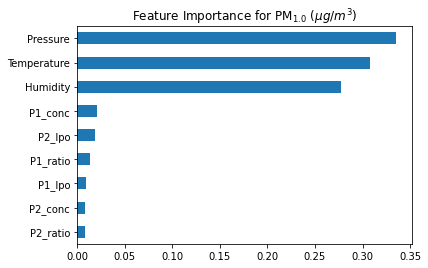

========================= LGBM Regressor ================================
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2107
[LightGBM] [Info] Number of data points in the train set: 6248, number of used features: 9
[LightGBM] [Info] Start training from score 5.648611
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

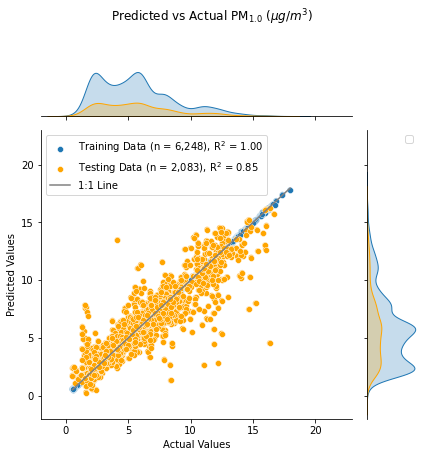

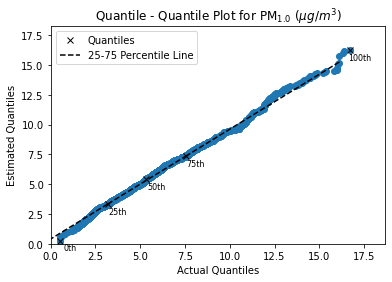

========================= Ensemble Bagging Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: Futu

        Actual  Predicted  Category
0     2.718542   1.554546   Testing
1     2.067500   2.327475   Testing
2     1.904375   2.152942  Training
3     1.681458   1.736079  Training
4     1.540208   1.838684  Training
...        ...        ...       ...
8326  4.982917   4.801377   Testing
8327  4.544583   4.621832  Training
8328  4.834167   4.808050  Training
8329  4.537917   4.669826  Training
8330  4.430000   4.539391  Training

[8331 rows x 3 columns]
R2 value of train data: 0.98
R2 value of test data: 0.87


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

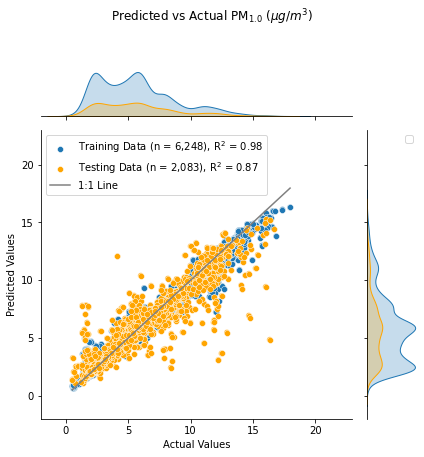

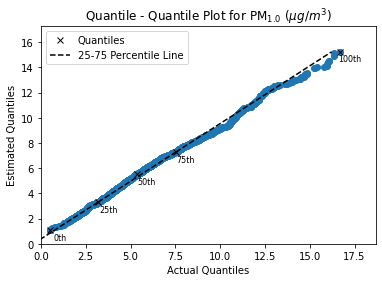

========================= Neural Network Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[100, 98, 91, 100, 90, 'relu', 0.00795554923286269, 0.003938348691125131, 1e-05, 117, 0.8219816974779155]
        Actual  Predicted  Category
0     2.718542   1.620123   Testing
1     2.067500   2.114158   Testing
2     1.904375   2.291882  Training
3     1.681458   1.763554  Training
4     1.540208   1.619083  Training
...        ...        ...       ...
8326  4.982917   4.742228   Testing
8327  4.544583   4.741592  Training
8328  4.834167   4.784380  Training
8329  4.537917   4.523942  Training
8330  4.430000   4.583729  Training

[8331 rows x 3 columns]
r2 train 0.91
r2 test 0.85


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

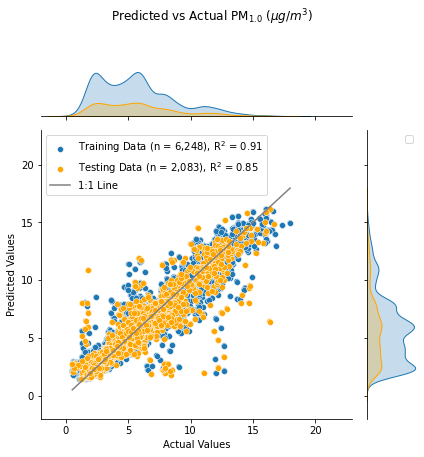

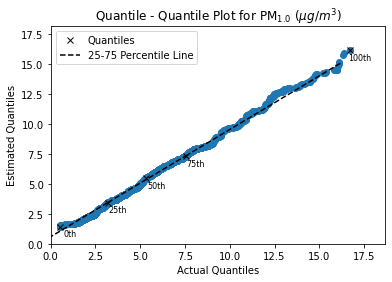

x train (6248, 9)
x test (2083, 9)
y train (6248,)
y test (2083,)
========================= Random Forest Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\opt

target:  pm2_5
number of esimators:  100
maximum depth:  29
minimum_samples_split:  2
min_samples_leaf:  1
         Actual  Predicted  Category
0      2.820000   1.655951   Testing
1      2.130000   3.185290   Testing
2      2.000000   1.873637  Training
3      1.876042   1.957460  Training
4      1.661458   1.737033  Training
...         ...        ...       ...
8326  12.055000  10.600250   Testing
8327   9.235833   9.979284  Training
8328  10.393750  10.387544  Training
8329   9.765417  10.104382  Training
8330   9.886667  10.175133  Training

[8331 rows x 3 columns]
R2 value of train data: 0.98
R2 value of test data: 0.86


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

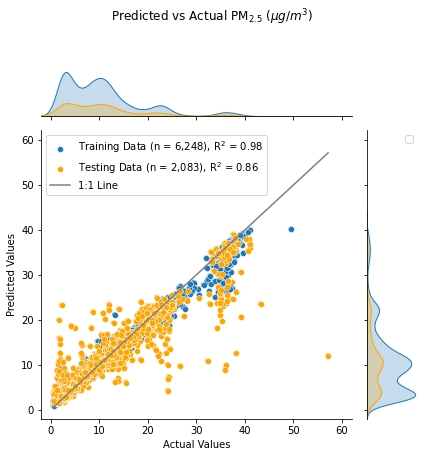

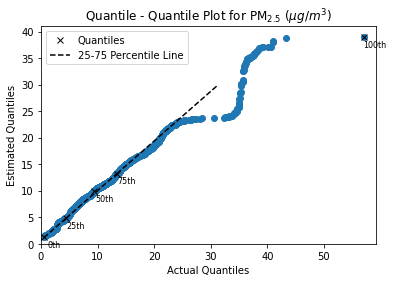

P1_lpo
P1_ratio
P1_conc
P2_lpo
P2_ratio
P2_conc
Temperature
Pressure
Humidity
feat_imp [0.01932712 0.01815292 0.02045066 0.01846084 0.01756223 0.01963964
 0.33530943 0.31318898 0.23790816]
P1_lpo         0.019327
P1_ratio       0.018153
P1_conc        0.020451
P2_lpo         0.018461
P2_ratio       0.017562
P2_conc        0.019640
Temperature    0.335309
Pressure       0.313189
Humidity       0.237908
dtype: float64


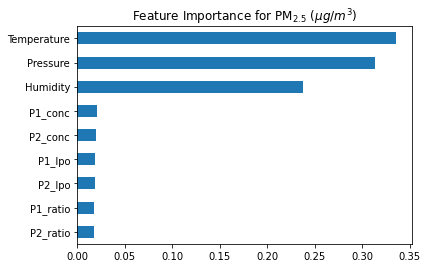

========================= Decision Tree Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


         Actual  Predicted  Category
0      2.820000   1.477083   Testing
1      2.130000   2.000000   Testing
2      2.000000   2.000000  Training
3      1.876042   1.876042  Training
4      1.661458   1.661458  Training
...         ...        ...       ...
8326  12.055000   9.727083   Testing
8327   9.235833   9.235833  Training
8328  10.393750  10.393750  Training
8329   9.765417   9.765417  Training
8330   9.886667   9.886667  Training

[8331 rows x 3 columns]
R2 value of train data 1.0
R2 value of test data 0.63


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

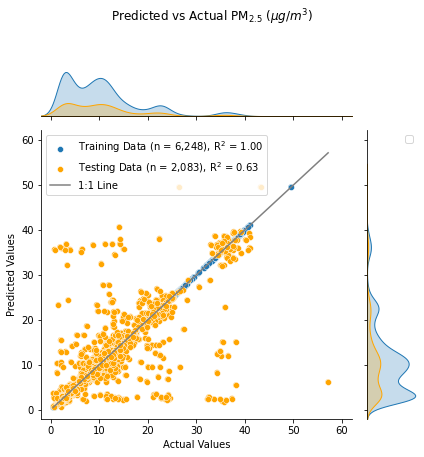

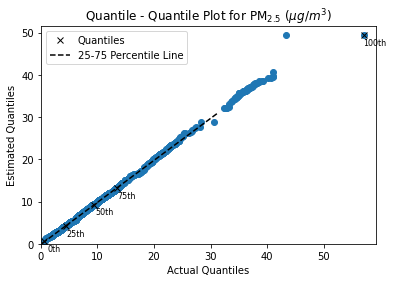

P1_lpo
P1_ratio
P1_conc
P2_lpo
P2_ratio
P2_conc
Temperature
Pressure
Humidity
feat_imp [0.01555124 0.03815254 0.00472036 0.01010714 0.01384767 0.0191093
 0.31216782 0.33212822 0.2542157 ]
P1_lpo         0.015551
P1_ratio       0.038153
P1_conc        0.004720
P2_lpo         0.010107
P2_ratio       0.013848
P2_conc        0.019109
Temperature    0.312168
Pressure       0.332128
Humidity       0.254216
dtype: float64


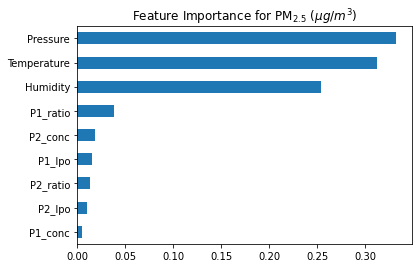

========================= LGBM Regressor ================================
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2107
[LightGBM] [Info] Number of data points in the train set: 6248, number of used features: 9
[LightGBM] [Info] Start training from score 10.535322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

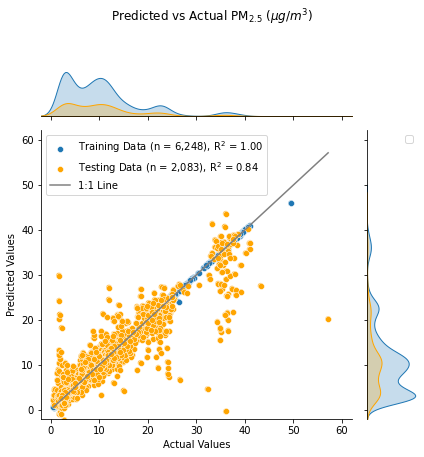

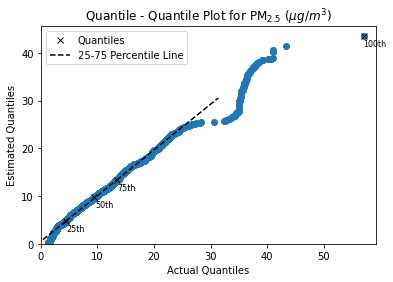

========================= Ensemble Bagging Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: Futu

         Actual  Predicted  Category
0      2.820000   1.640333   Testing
1      2.130000   3.746588   Testing
2      2.000000   2.030129  Training
3      1.876042   1.836517  Training
4      1.661458   1.691500  Training
...         ...        ...       ...
8326  12.055000  10.438613   Testing
8327   9.235833   9.905595  Training
8328  10.393750  10.307745  Training
8329   9.765417  10.114842  Training
8330   9.886667  10.134377  Training

[8331 rows x 3 columns]
R2 value of train data: 0.98
R2 value of test data: 0.85


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

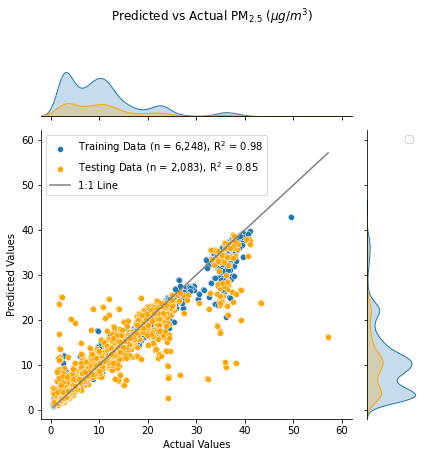

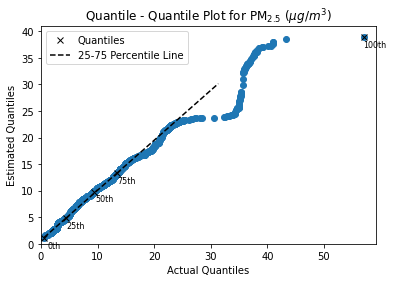

========================= Neural Network Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[71, 100, 86, 100, 66, 'relu', 1e-05, 0.00220725662611458, 1e-05, 131, 0.8074585188804813]
         Actual  Predicted  Category
0      2.820000   0.934671   Testing
1      2.130000   2.285455   Testing
2      2.000000   3.418055  Training
3      1.876042   0.842836  Training
4      1.661458   1.102226  Training
...         ...        ...       ...
8326  12.055000   9.711624   Testing
8327   9.235833   9.754533  Training
8328  10.393750   9.793509  Training
8329   9.765417  10.079748  Training
8330   9.886667   9.990217  Training

[8331 rows x 3 columns]
r2 train 0.95
r2 test 0.83


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

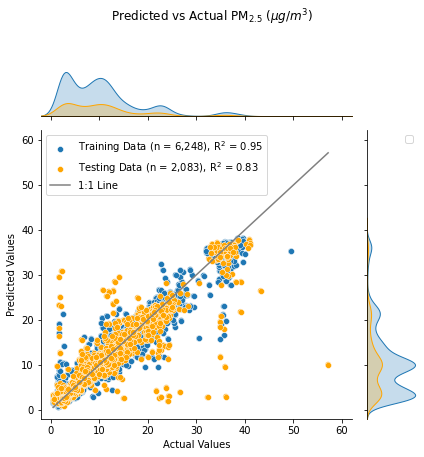

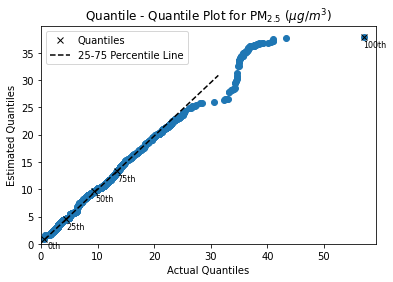

x train (6248, 9)
x test (2083, 9)
y train (6248,)
y test (2083,)
========================= Random Forest Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\opt

target:  pm4
number of esimators:  100
maximum depth:  30
minimum_samples_split:  2
min_samples_leaf:  1
         Actual  Predicted  Category
0      3.085417   2.201482   Testing
1      2.232708   7.540467   Testing
2      2.135833   2.257662  Training
3      2.078333   2.526346  Training
4      1.834792   1.867090  Training
...         ...        ...       ...
8326  21.223333  18.532829   Testing
8327  15.932083  17.209183  Training
8328  16.646667  17.782960  Training
8329  16.986667  16.757464  Training
8330  17.401667  17.437176  Training

[8331 rows x 3 columns]
R2 value of train data: 0.98
R2 value of test data: 0.85


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

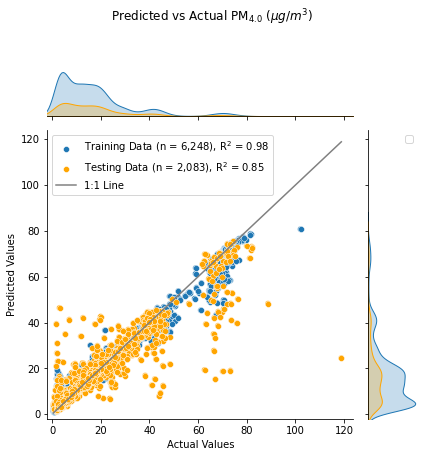

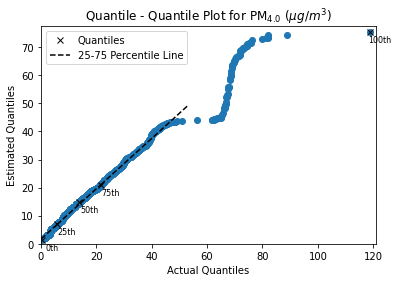

P1_lpo
P1_ratio
P1_conc
P2_lpo
P2_ratio
P2_conc
Temperature
Pressure
Humidity
feat_imp [0.02243805 0.01621526 0.02343381 0.01652619 0.01773709 0.01774207
 0.30333696 0.32481926 0.2577513 ]
P1_lpo         0.022438
P1_ratio       0.016215
P1_conc        0.023434
P2_lpo         0.016526
P2_ratio       0.017737
P2_conc        0.017742
Temperature    0.303337
Pressure       0.324819
Humidity       0.257751
dtype: float64


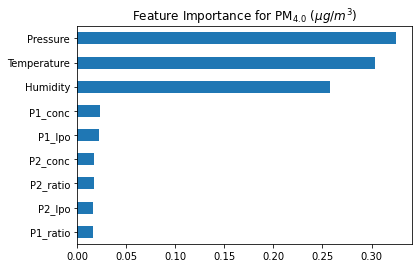

========================= Decision Tree Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\opt

         Actual  Predicted  Category
0      3.085417   1.752083   Testing
1      2.232708   2.135833   Testing
2      2.135833   2.135833  Training
3      2.078333   2.078333  Training
4      1.834792   1.834792  Training
...         ...        ...       ...
8326  21.223333  15.932083   Testing
8327  15.932083  15.932083  Training
8328  16.646667  16.646667  Training
8329  16.986667  16.986667  Training
8330  17.401667  17.401667  Training

[8331 rows x 3 columns]
R2 value of train data 1.0
R2 value of test data 0.7


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

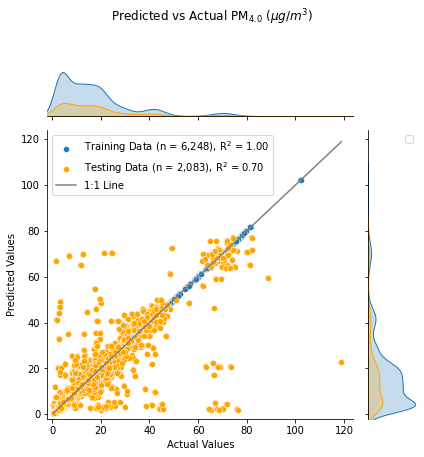

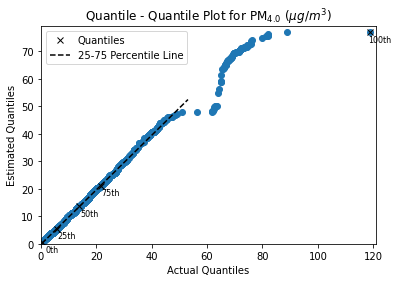

P1_lpo
P1_ratio
P1_conc
P2_lpo
P2_ratio
P2_conc
Temperature
Pressure
Humidity
feat_imp [0.01159909 0.04299319 0.01416427 0.02680808 0.01052793 0.01785037
 0.29216664 0.31753495 0.26635548]
P1_lpo         0.011599
P1_ratio       0.042993
P1_conc        0.014164
P2_lpo         0.026808
P2_ratio       0.010528
P2_conc        0.017850
Temperature    0.292167
Pressure       0.317535
Humidity       0.266355
dtype: float64


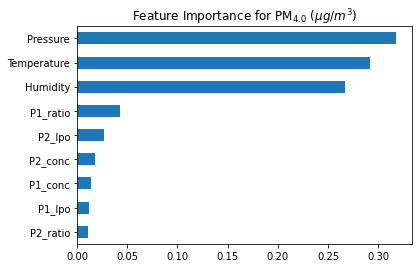

========================= LGBM Regressor ================================
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2107
[LightGBM] [Info] Number of data points in the train set: 6248, number of used features: 9
[LightGBM] [Info] Start training from score 17.079327
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

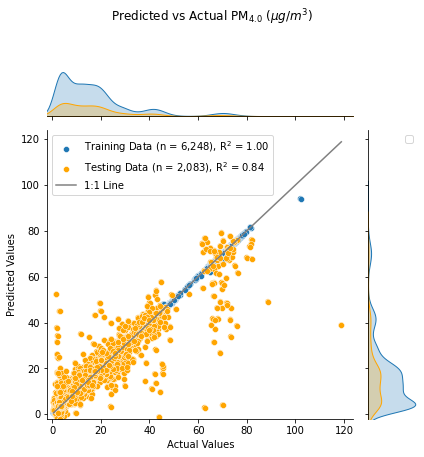

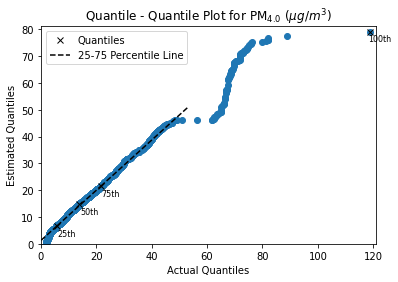

========================= Ensemble Bagging Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: Futu

         Actual  Predicted  Category
0      3.085417   2.181692   Testing
1      2.232708   8.008556   Testing
2      2.135833   2.920737  Training
3      2.078333   2.036387  Training
4      1.834792   1.839430  Training
...         ...        ...       ...
8326  21.223333  18.377507   Testing
8327  15.932083  17.360850  Training
8328  16.646667  17.749237  Training
8329  16.986667  17.233476  Training
8330  17.401667  18.169508  Training

[8331 rows x 3 columns]
R2 value of train data: 0.98
R2 value of test data: 0.84


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

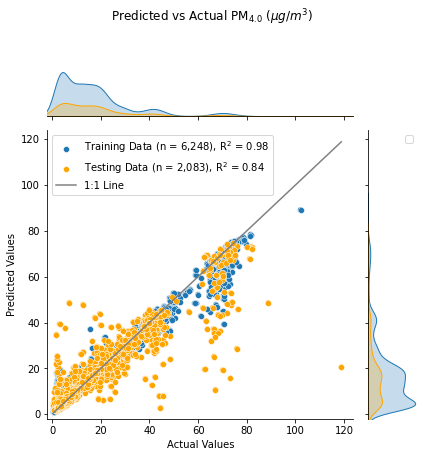

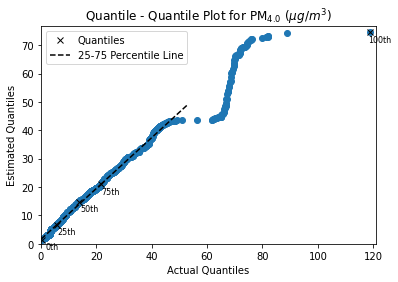

========================= Neural Network Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[90, 100, 100, 10, 47, 'relu', 0.008820540198443347, 0.014165171943549043, 1e-05, 256, 0.5238747538594958]
         Actual  Predicted  Category
0      3.085417   4.182431   Testing
1      2.232708   4.182431   Testing
2      2.135833   4.182431  Training
3      2.078333   4.182431  Training
4      1.834792   4.182431  Training
...         ...        ...       ...
8326  21.223333  18.312091   Testing
8327  15.932083  18.261379  Training
8328  16.646667  18.033150  Training
8329  16.986667  16.197174  Training
8330  17.401667  16.862176  Training

[8331 rows x 3 columns]
r2 train 0.91
r2 test 0.82


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

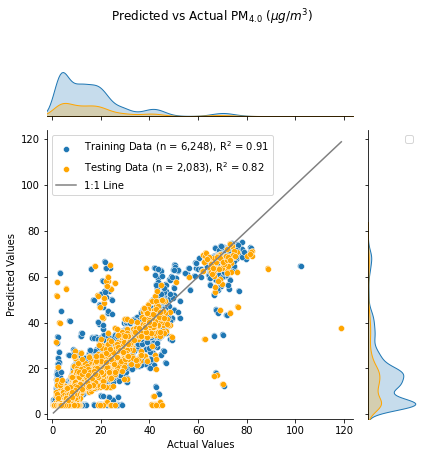

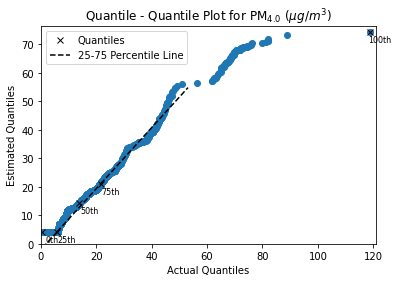

x train (6248, 9)
x test (2083, 9)
y train (6248,)
y test (2083,)
========================= Random Forest Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\opt

target:  pm10
number of esimators:  100
maximum depth:  30
minimum_samples_split:  2
min_samples_leaf:  1
         Actual  Predicted  Category
0      3.112500   5.047483   Testing
1      2.231875  13.486144   Testing
2      2.132083   5.423910  Training
3      2.072917   2.131402  Training
4      1.824792   2.134746  Training
...         ...        ...       ...
8326  31.216250  22.767459   Testing
8327  17.556667  20.339660  Training
8328  24.890000  24.349404  Training
8329  18.576667  20.672100  Training
8330  20.421250  21.249528  Training

[8331 rows x 3 columns]
R2 value of train data: 0.98
R2 value of test data: 0.83


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

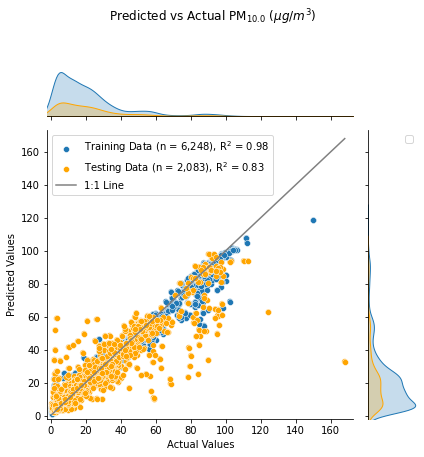

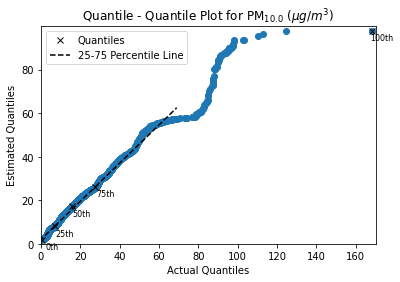

P1_lpo
P1_ratio
P1_conc
P2_lpo
P2_ratio
P2_conc
Temperature
Pressure
Humidity
feat_imp [0.02161603 0.01861822 0.02096796 0.01614617 0.01695297 0.01764599
 0.30833034 0.34790671 0.2318156 ]
P1_lpo         0.021616
P1_ratio       0.018618
P1_conc        0.020968
P2_lpo         0.016146
P2_ratio       0.016953
P2_conc        0.017646
Temperature    0.308330
Pressure       0.347907
Humidity       0.231816
dtype: float64


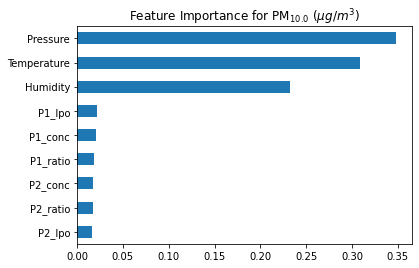

========================= Decision Tree Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\opt

         Actual  Predicted  Category
0      3.112500   2.026250   Testing
1      2.231875   2.026250   Testing
2      2.132083   2.132083  Training
3      2.072917   2.072917  Training
4      1.824792   1.824792  Training
...         ...        ...       ...
8326  31.216250  17.000000   Testing
8327  17.556667  17.556667  Training
8328  24.890000  24.890000  Training
8329  18.576667  18.576667  Training
8330  20.421250  20.421250  Training

[8331 rows x 3 columns]
R2 value of train data 1.0
R2 value of test data 0.67


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

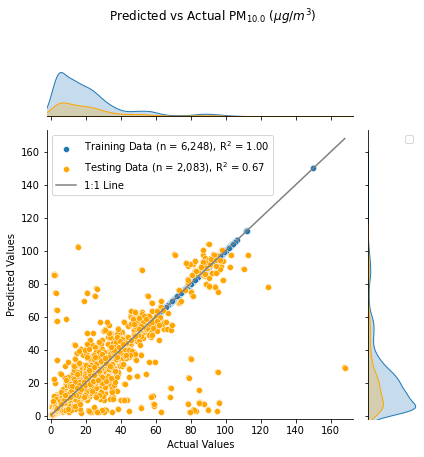

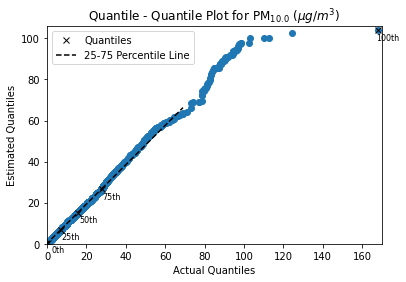

P1_lpo
P1_ratio
P1_conc
P2_lpo
P2_ratio
P2_conc
Temperature
Pressure
Humidity
feat_imp [0.00916916 0.00529738 0.01112981 0.00705566 0.01824527 0.00789379
 0.28206861 0.45212676 0.20701355]
P1_lpo         0.009169
P1_ratio       0.005297
P1_conc        0.011130
P2_lpo         0.007056
P2_ratio       0.018245
P2_conc        0.007894
Temperature    0.282069
Pressure       0.452127
Humidity       0.207014
dtype: float64


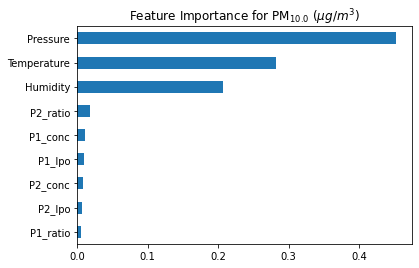

========================= LGBM Regressor ================================
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2107
[LightGBM] [Info] Number of data points in the train set: 6248, number of used features: 9
[LightGBM] [Info] Start training from score 21.125653
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

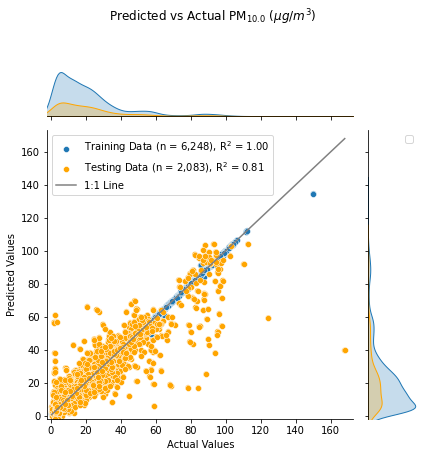

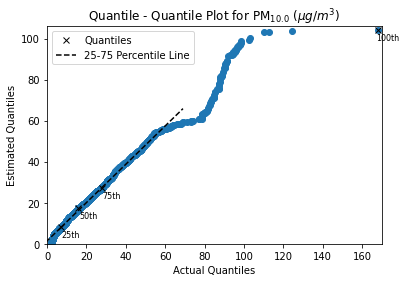

========================= Ensemble Bagging Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: Futu

         Actual  Predicted  Category
0      3.112500   2.807817   Testing
1      2.231875   9.070516   Testing
2      2.132083   3.381629  Training
3      2.072917   2.030671  Training
4      1.824792   1.926235  Training
...         ...        ...       ...
8326  31.216250  23.217042   Testing
8327  17.556667  21.040836  Training
8328  24.890000  24.176769  Training
8329  18.576667  19.628667  Training
8330  20.421250  21.171246  Training

[8331 rows x 3 columns]
R2 value of train data: 0.98
R2 value of test data: 0.82


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

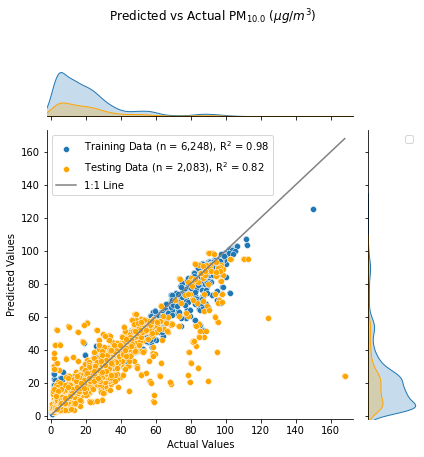

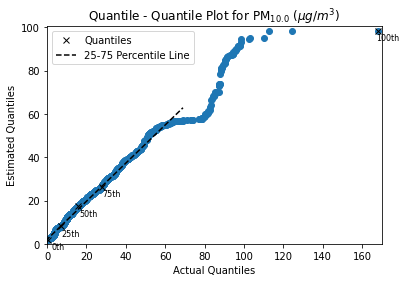

========================= Neural Network Regressor ================================
[97, 96, 20, 91, 28, 'relu', 0.0030450378874930964, 0.0015576205712997115, 1e-05, 112, 0.8507507465847512]
         Actual  Predicted  Category
0      3.112500   3.527465   Testing
1      2.231875   6.855437   Testing
2      2.132083   4.895451  Training
3      2.072917   3.846057  Training
4      1.824792   3.864318  Training
...         ...        ...       ...
8326  31.216250  20.609781   Testing
8327  17.556667  21.337948  Training
8328  24.890000  20.585206  Training
8329  18.576667  22.804453  Training
8330  20.421250  22.237742  Training

[8331 rows x 3 columns]
r2 train 0.92
r2 test 0.8


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

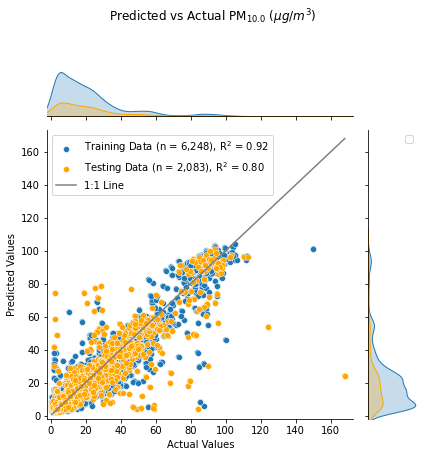

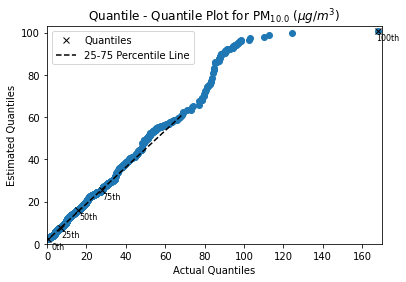

x train (6248, 9)
x test (2083, 9)
y train (6248,)
y test (2083,)
========================= Random Forest Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\opt

target:  pmTotal
number of esimators:  100
maximum depth:  29
minimum_samples_split:  2
min_samples_leaf:  1
         Actual  Predicted  Category
0      3.148958   6.721565   Testing
1      2.232708  19.583063   Testing
2      2.135833   7.792992  Training
3      2.086667   4.557837  Training
4      1.834792   2.108705  Training
...         ...        ...       ...
8326  37.864167  28.832967   Testing
8327  19.295000  23.321875  Training
8328  29.965000  29.159882  Training
8329  20.265833  23.239488  Training
8330  22.930000  24.187993  Training

[8331 rows x 3 columns]
R2 value of train data: 0.98
R2 value of test data: 0.79


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

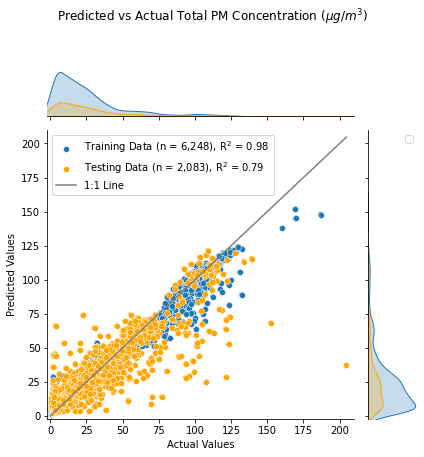

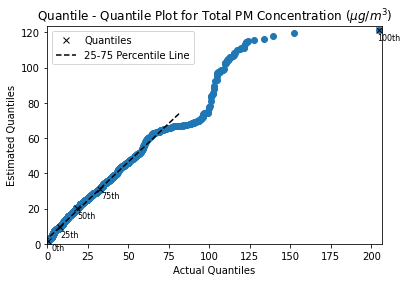

P1_lpo
P1_ratio
P1_conc
P2_lpo
P2_ratio
P2_conc
Temperature
Pressure
Humidity
feat_imp [0.02333786 0.02129492 0.02005761 0.02126776 0.01908029 0.01871614
 0.30415067 0.37015845 0.2019363 ]
P1_lpo         0.023338
P1_ratio       0.021295
P1_conc        0.020058
P2_lpo         0.021268
P2_ratio       0.019080
P2_conc        0.018716
Temperature    0.304151
Pressure       0.370158
Humidity       0.201936
dtype: float64


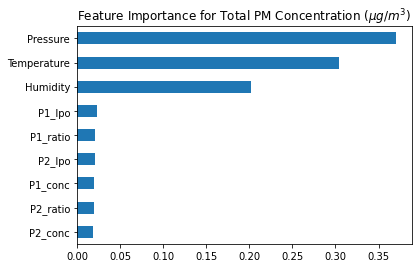

========================= Decision Tree Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


         Actual  Predicted  Category
0      3.148958   2.033333   Testing
1      2.232708   2.033333   Testing
2      2.135833   2.135833  Training
3      2.086667   2.086667  Training
4      1.834792   1.834792  Training
...         ...        ...       ...
8326  37.864167  23.645000   Testing
8327  19.295000  19.295000  Training
8328  29.965000  29.965000  Training
8329  20.265833  20.265833  Training
8330  22.930000  22.930000  Training

[8331 rows x 3 columns]
R2 value of train data 1.0
R2 value of test data 0.6


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

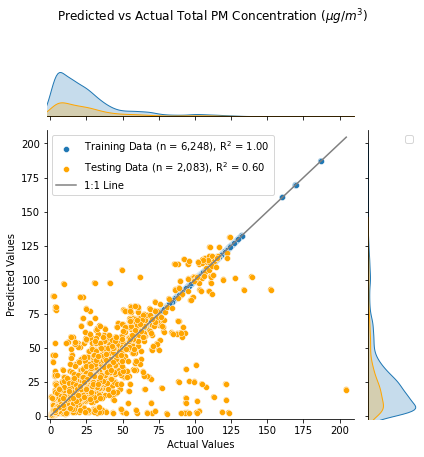

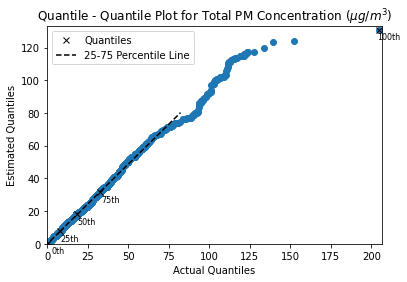

P1_lpo
P1_ratio
P1_conc
P2_lpo
P2_ratio
P2_conc
Temperature
Pressure
Humidity
feat_imp [0.01371282 0.00676581 0.02004009 0.01236969 0.01495456 0.01914639
 0.27486647 0.44112945 0.19701473]
P1_lpo         0.013713
P1_ratio       0.006766
P1_conc        0.020040
P2_lpo         0.012370
P2_ratio       0.014955
P2_conc        0.019146
Temperature    0.274866
Pressure       0.441129
Humidity       0.197015
dtype: float64


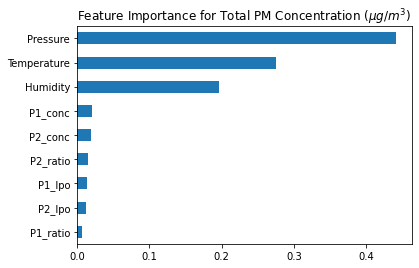

========================= LGBM Regressor ================================
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2107
[LightGBM] [Info] Number of data points in the train set: 6248, number of used features: 9
[LightGBM] [Info] Start training from score 24.831595
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

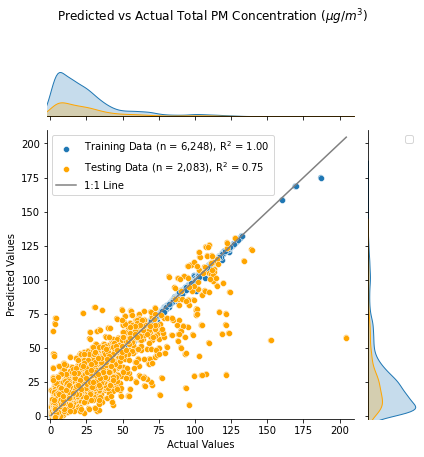

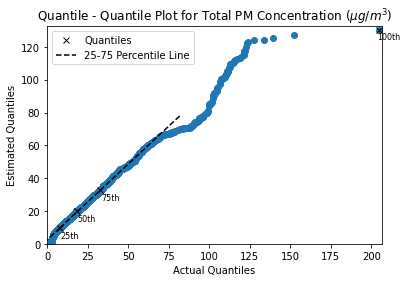

========================= Ensemble Bagging Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: Futu

         Actual  Predicted  Category
0      3.148958   4.417092   Testing
1      2.232708  14.876888   Testing
2      2.135833   7.300046  Training
3      2.086667   2.791308  Training
4      1.834792   2.089915  Training
...         ...        ...       ...
8326  37.864167  27.760544   Testing
8327  19.295000  22.189498  Training
8328  29.965000  31.596262  Training
8329  20.265833  21.993443  Training
8330  22.930000  23.768457  Training

[8331 rows x 3 columns]
R2 value of train data: 0.97
R2 value of test data: 0.78


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

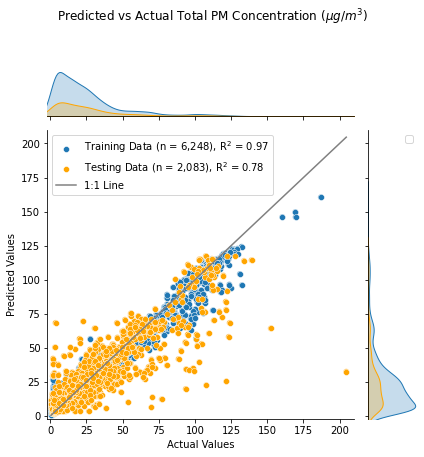

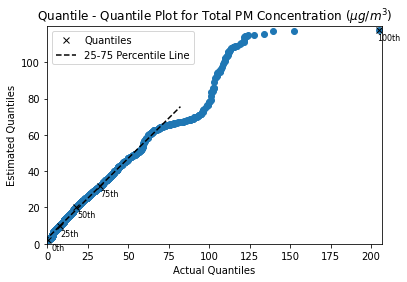

========================= Neural Network Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[82, 81, 72, 78, 31, 'relu', 1e-05, 0.0033395146125709367, 1e-05, 256, 0.8532979062508104]
         Actual  Predicted  Category
0      3.148958  -0.018984   Testing
1      2.232708   1.545968   Testing
2      2.135833   1.937472  Training
3      2.086667  -0.611102  Training
4      1.834792   0.620752  Training
...         ...        ...       ...
8326  37.864167  28.200618   Testing
8327  19.295000  28.290961  Training
8328  29.965000  27.865749  Training
8329  20.265833  22.270263  Training
8330  22.930000  23.552865  Training

[8331 rows x 3 columns]
r2 train 0.89
r2 test 0.76


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

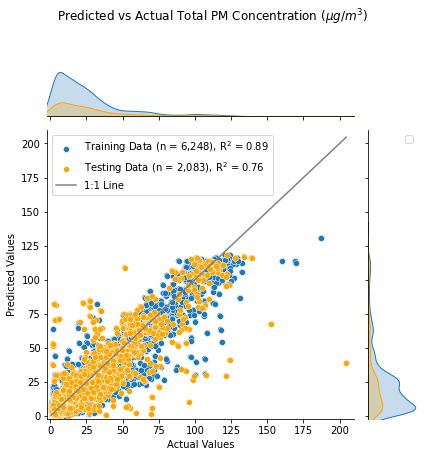

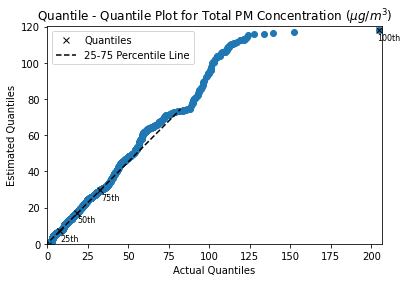

x train (6248, 9)
x test (2083, 9)
y train (6248,)
y test (2083,)
========================= Random Forest Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\opt

target:  dCn
number of esimators:  100
maximum depth:  25
minimum_samples_split:  2
min_samples_leaf:  1
         Actual  Predicted  Category
0     97.440417  60.486329   Testing
1     73.388750  65.287027   Testing
2     66.655000  67.342410  Training
3     58.758958  97.564896  Training
4     57.921875  64.748790  Training
...         ...        ...       ...
8326  77.197500  76.978980   Testing
8327  71.974583  73.898272  Training
8328  72.302500  75.716865  Training
8329  70.609167  73.818394  Training
8330  70.784167  72.864117  Training

[8331 rows x 3 columns]
R2 value of train data: 0.98
R2 value of test data: 0.86


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

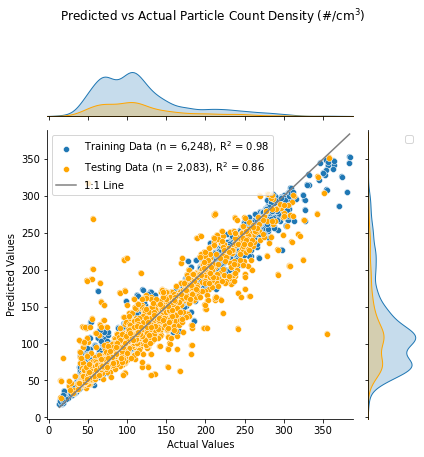

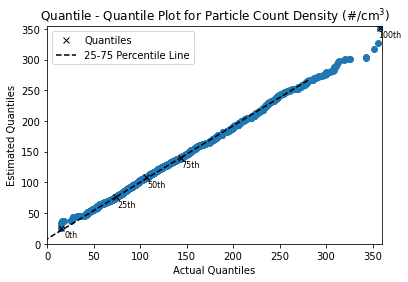

P1_lpo
P1_ratio
P1_conc
P2_lpo
P2_ratio
P2_conc
Temperature
Pressure
Humidity
feat_imp [0.01660294 0.01462741 0.01566338 0.01648416 0.01693273 0.01713285
 0.28827776 0.35156909 0.26270968]
P1_lpo         0.016603
P1_ratio       0.014627
P1_conc        0.015663
P2_lpo         0.016484
P2_ratio       0.016933
P2_conc        0.017133
Temperature    0.288278
Pressure       0.351569
Humidity       0.262710
dtype: float64


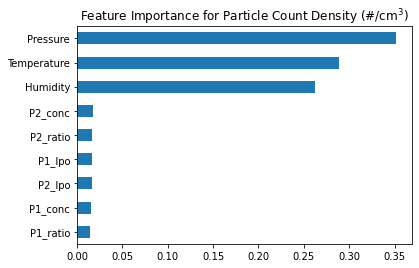

========================= Decision Tree Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


         Actual  Predicted  Category
0     97.440417  66.655000   Testing
1     73.388750  66.655000   Testing
2     66.655000  66.655000  Training
3     58.758958  58.758958  Training
4     57.921875  57.921875  Training
...         ...        ...       ...
8326  77.197500  75.039583   Testing
8327  71.974583  71.974583  Training
8328  72.302500  72.302500  Training
8329  70.609167  70.609167  Training
8330  70.784167  70.784167  Training

[8331 rows x 3 columns]
R2 value of train data 1.0
R2 value of test data 0.69


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

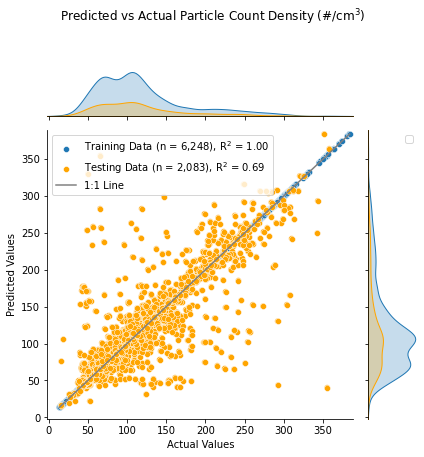

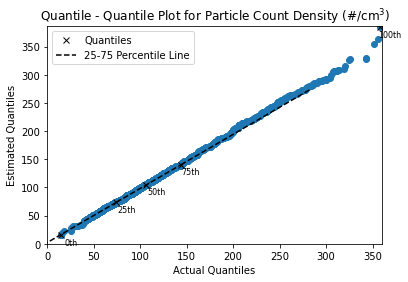

P1_lpo
P1_ratio
P1_conc
P2_lpo
P2_ratio
P2_conc
Temperature
Pressure
Humidity
feat_imp [0.02561257 0.01132346 0.01329233 0.01273307 0.01212137 0.02629637
 0.25621469 0.36331386 0.27909227]
P1_lpo         0.025613
P1_ratio       0.011323
P1_conc        0.013292
P2_lpo         0.012733
P2_ratio       0.012121
P2_conc        0.026296
Temperature    0.256215
Pressure       0.363314
Humidity       0.279092
dtype: float64


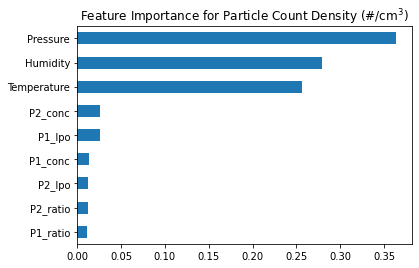

========================= LGBM Regressor ================================
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2107
[LightGBM] [Info] Number of data points in the train set: 6248, number of used features: 9
[LightGBM] [Info] Start training from score 118.269355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

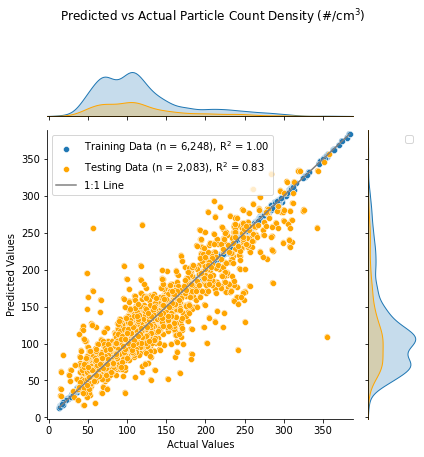

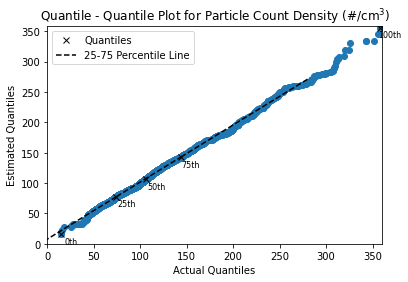

========================= Ensemble Bagging Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: Futu

         Actual   Predicted  Category
0     97.440417   59.251320   Testing
1     73.388750   65.728738   Testing
2     66.655000   67.595833  Training
3     58.758958  110.418454  Training
4     57.921875   78.717834  Training
...         ...         ...       ...
8326  77.197500   77.360612   Testing
8327  71.974583   74.255250  Training
8328  72.302500   76.775506  Training
8329  70.609167   73.121062  Training
8330  70.784167   72.445736  Training

[8331 rows x 3 columns]
R2 value of train data: 0.98
R2 value of test data: 0.85


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

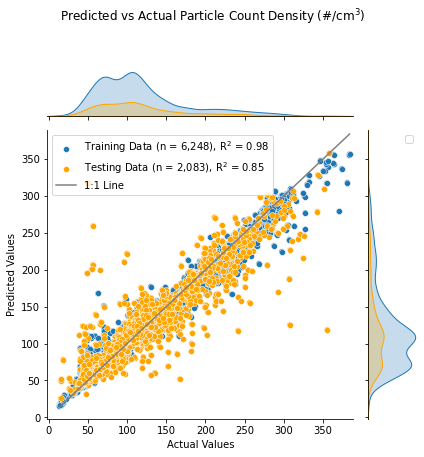

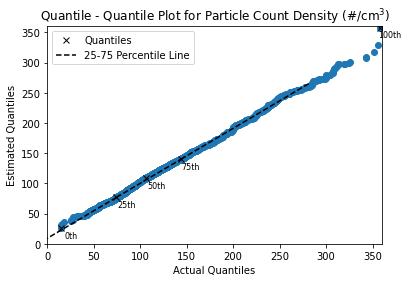

========================= Neural Network Regressor ================================


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[100, 81, 61, 100, 89, 'relu', 0.022071709914308495, 0.0005636184271008112, 1e-05, 151, 0.8391982645517746]
         Actual  Predicted  Category
0     97.440417  54.765830   Testing
1     73.388750  82.321242   Testing
2     66.655000  83.724618  Training
3     58.758958  70.316809  Training
4     57.921875  94.688838  Training
...         ...        ...       ...
8326  77.197500  88.559054   Testing
8327  71.974583  87.384624  Training
8328  72.302500  84.590240  Training
8329  70.609167  84.393492  Training
8330  70.784167  85.522834  Training

[8331 rows x 3 columns]
r2 train 0.87
r2 test 0.74


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x720 with 0 Axes>

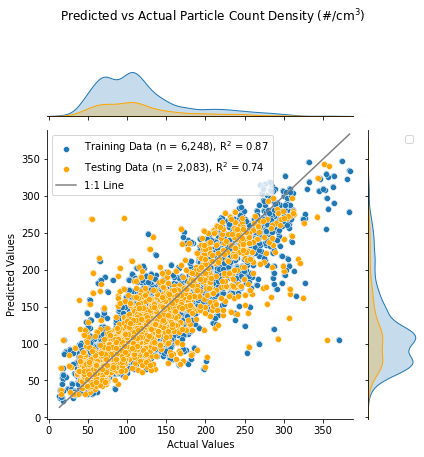

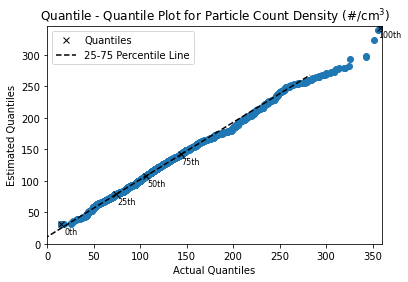

In [205]:
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Linear_Regression.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Random_Forest_Regression.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Decision_Tree_Regression.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Ensemble_Bagging_Regression.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/LGBM_Regression.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Gaussian_Regression.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Ridge_Regression.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/KNN_Regression.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Neural_Network_Regression.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Stacking_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Random_Forest_Regression_Optimized.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Neural_Network_Regression_Optimized.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Decision_Tree_Regression_Optimized.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Ensemble_Bagging_Regression_Optimized.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/LGBM_Regression_Optimized.ipynb



    
trained_model_nn={}
trained_model_rf={}
trained_model_br={}
trained_model_dt={}
trained_model_lgbm={}

hyperparameters_nn={}
hyperparameters_rf={}
hyperparameters_br={}
hyperparameters_dt={}
hyperparameters_lgbm={} 

r2_score_test_nn ={}
r2_score_test_rf ={}
r2_score_test_br ={}
r2_score_test_dt ={}
r2_score_test_lgbm ={}

for k,v in enumerate(Palas):
    #v='pm1'
    X = Palas[v].drop([v+"Palas"],axis = 1)
    y = Palas[v][v+"Palas"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
    print("x train",X_train.shape)
    print("x test",X_test.shape)
    print("y train",y_train.shape)
    print("y test",y_test.shape)
        
    print("========================= Random Forest Regressor ================================")
    model,hyperparameters,r2_score_test = Random_Forest_Regression(X_train,X_test,y_train,y_test,filtered_data)
    trained_model_rf[v] = model
    hyperparameters_rf[v] = hyperparameters
    r2_score_test_rf[v] = r2_score_test


    print("========================= Decision Tree Regressor ================================")
    model,hyperparameters,r2_score_test = Decision_Tree_Regression(X_train,X_test,y_train,y_test,filtered_data)   
    trained_model_dt[v] = model
    hyperparameters_dt[v] = hyperparameters
    r2_score_test_dt[v] = r2_score_test


    print("========================= LGBM Regressor ================================")
    model,hyperparameters,r2_score_test  =  LGBM_Regression(X_train,X_test,y_train,y_test,filtered_data)
    trained_model_lgbm[v] = model
    hyperparameters_lgbm[v] = hyperparameters
    r2_score_test_lgbm[v] = r2_score_test
    
    print("========================= Ensemble Bagging Regressor ================================")
    model,hyperparameters,r2_score_test = Ensemble_Bagging_Regression(X_train,X_test,y_train,y_test,filtered_data)
    trained_model_br[v] = model
    hyperparameters_br[v] = hyperparameters
    r2_score_test_br[v] = r2_score_test

    print("========================= Neural Network Regressor ================================")
    model,hyperparameters,r2_score_test = Neural_Network_Regression(X_train,X_test,y_train,y_test,filtered_data)
    trained_model_nn[v] = model
    hyperparameters_nn[v] = hyperparameters
    r2_score_test_nn[v] = r2_score_test
    
# print("========================= Linear Regressor ================================")
# Linear_Regression(X_train,X_test,y_train,y_test,filtered_data)


    


#     # print("========================= LGBM Regressor ================================")
#     # model,hyperparameters,r2_score_test  =  LGBM_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     # trained_model_lgbm[v] = model
#     # hyperparameters_lgbm[v] = hyperparameters
#     # r2_score_test_lgbm = r2_score_test

# # #     print("========================= Gaussian Regressor ================================")
# # # #    Gaussian_Regression(X_train,X_test,y_train,y_test,filtered_data)



# # #     print("========================= Ridge Regressor ================================")
# # #     Ridge_Regression(X_train,X_test,y_train,y_test,filtered_data)
    
# # #     print("========================= KNN Regressor ================================")
# # #     KNN_Regression(X_train,X_test,y_train,y_test,filtered_data)
    



In [211]:
combined_dict ={key: [r2_score_test_rf.get(key), r2_score_test_br.get(key),r2_score_test_lgbm.get(key), r2_score_test_nn.get(key), r2_score_test_dt.get(key)] for key in r2_score_test_nn}
r2_values = combined_dict

In [213]:
# Creating a DataFrame from the dictionary
models = ["Random Forest", "Ensemble Bagging","LGBM", "Neural Network", "Decision Tree"]
r2_values
df_updated_r2 = pd.DataFrame(r2_values, index=models)
df_updated_r2.index.name = 'Model'
df_updated_r2.columns.name = 'Target Variable'

df_updated_r2.head()

Target Variable    pm1  pm2_5   pm4  pm10  pmTotal   dCn
Model                                                   
Random Forest     0.87   0.86  0.85  0.83     0.79  0.86
Ensemble Bagging  0.87   0.85  0.84  0.82     0.78  0.85
LGBM              0.85   0.84  0.84  0.81     0.75  0.83
Neural Network    0.85   0.83  0.82  0.80     0.76  0.74
Decision Tree     0.78   0.63  0.70  0.67     0.60  0.69

In [ ]:
#     print("========================= Random Forest Regressor ================================")
#     model,hyperparameters = Random_Forest_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     trained_model_rf[v] = model
#     hyperparameters_rf[v] = hyperparameters
    
#     print("========================= Decision Tree Regressor ================================")
#     model,hyperparameters = Decision_Tree_Regression(X_train,X_test,y_train,y_test,filtered_data)   
#     trained_model_dt[v] = model
#     hyperparameters_dt[v] = hyperparameters
#     # print("========================= LGBM Regressor ================================")
#     # model,hyperparameters =  LGBM_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     # trained_model_lgbm[v] = model
#     # hyperparameters_lgbm[v] = hyperparameters
# # #     print("========================= Gaussian Regressor ================================")
# # # #    Gaussian_Regression(X_train,X_test,y_train,y_test,filtered_data)

#     print("========================= Ensemble Bagging Regressor ================================")
#     model,hyperparameters = Ensemble_Bagging_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     trained_model_br[v] = model
#     hyperparameters_br[v] = hyperparameters
# # #     print("========================= Ridge Regressor ================================")
# # #     Ridge_Regression(X_train,X_test,y_train,y_test,filtered_data)
    
# # #     print("========================= KNN Regressor ================================")
# # #     KNN_Regression(X_train,X_test,y_train,y_test,filtered_data)
    
#     print("========================= Neural Network Regressor ================================")
#     model,hyperparameters = Neural_Network_Regression(X_train,X_test,y_train,y_test,filtered_data)
#     trained_model_nn[v] = model
#     hyperparameters_nn[v] = hyperparameters

In [2]:
trained_model_nn

NameError: name 'trained_model_nn' is not defined

In [3]:
hyperparameters_nn

NameError: name 'hyperparameters_nn' is not defined

In [1]:
with open("hyperparameters_nn.pkl", "wb") as f:
    pickle.dump(hyperparameters_nn, f)
with open('hyperparameters_nn.pkl', 'rb') as file:
    data = pickle.load(file)
print(data)

with open("trained_model_nn.pkl", "wb") as f:
    pickle.dump(trained_model_nn, f)
with open('trained_model_nn.pkl', 'rb') as file:
    data = pickle.load(file)
print(data)

NameError: name 'pickle' is not defined

In [ ]:
with open("hyperparameters_rf.pkl", "wb") as f:
    pickle.dump(hyperparameters_rf, f)
with open('hyperparameters_rf.pkl', 'rb') as file:
    data = pickle.load(file)
print(data)

with open("trained_model_rf.pkl", "wb") as f:
    pickle.dump(trained_model_rf, f)
with open('trained_model_rf.pkl', 'rb') as file:
    data = pickle.load(file)
print(data)

In [ ]:
with open("hyperparameters_dt.pkl", "wb") as f:
    pickle.dump(hyperparameters_dt, f)
with open('hyperparameters_dt.pkl', 'rb') as file:
    data = pickle.load(file)
print(data)

with open("trained_model_dt.pkl", "wb") as f:
    pickle.dump(trained_model_dt, f)
with open('trained_model_dt.pkl', 'rb') as file:
    data = pickle.load(file)
print(data)

In [ ]:
with open("hyperparameters_br.pkl", "wb") as f:
    pickle.dump(hyperparameters_br, f)
with open('hyperparameters_br.pkl', 'rb') as file:
    data = pickle.load(file)
print(data)

with open("trained_model_br.pkl", "wb") as f:
    pickle.dump(trained_model_br, f)
with open('trained_model_br.pkl', 'rb') as file:
    data = pickle.load(file)
print(data)

In [ ]:
with open("hyperparameters_lgbm.pkl", "wb") as f:
    pickle.dump(hyperparameters_lgbm, f)
with open('hyperparameters_lgbm.pkl', 'rb') as file:
    data = pickle.load(file)
print(data)

with open("trained_model_lgbm.pkl", "wb") as f:
    pickle.dump(trained_model_lgbm, f)
with open('trained_model_lgbm.pkl', 'rb') as file:
    data = pickle.load(file)
print(data)

In [ ]:
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Stacking_Regression.ipynb
for k,v in enumerate(Palas):
    #v='pm1'
    X = Palas[v].drop([v+"Palas"],axis = 1)
    y = Palas[v][v+"Palas"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
    print("x train",X_train.shape)
    print("x test",X_test.shape)
    print("y train",y_train.shape)
    print("y test",y_test.shape)
    print("========================= Stacking Regressor ================================")
    Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data)

In [ ]:
# for k,v in enumerate(Palas):
v='pm1'
X = Palas[v].drop([v+"Palas"],axis = 1)
y = Palas[v][v+"Palas"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
print("x train",X_train.shape)
print("x test",X_test.shape)
print("y train",y_train.shape)
print("y test",y_test.shape)


print("========================= Linear Regressor ================================")
Linear_Regression(X_train,X_test,y_train,y_test,filtered_data)